# Calculate Arctic Regional ice term averages from Rufmod experiments

* **Description**: Reads in and creates regional averages from rufmod experiment
* **Input data**: Rufmod output in timeseries format
* **Output data**: Netcdf with processed ice state for all members
* **Creator**: Alice DuVivier
* **Date**: August 2022

The rufmod experiments were performed where the sea ice roughness over Arctic sea ice regions was set to be equal to what it would be over open ocean. This is to better understand ice-atmosphere coupling, processes, and feedbacks.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob
import dask
from matplotlib.gridspec import GridSpec

In [2]:
# list the variables to load
var_in_1 = 'sispeed'
var_in_0 = 'aice'  # needed to mask data

## Load rufmod experiments

In [3]:
# Load "rufmod" data
#choose cases and data paths
case1 = 'b.e21.BSSP370.f09_g17.rufmod.001'
case2 = 'b.e21.BSSP370.f09_g17.rufmod.002'
case3 = 'b.e21.BSSP370.f09_g17.rufmod.003'
case4 = 'b.e21.BSSP370.f09_g17.rufmod.004'
case5 = 'b.e21.BSSP370.f09_g17.rufmod.005'

# set base directory where all data live
data_dir = '/glade/campaign/cesm/development/pcwg/projects/arctic_cyclones/rufmod_expts/'
# set individual data directories
data_dir1 = data_dir+case1+'/ice/proc/tseries/month_1/'
data_dir2 = data_dir+case2+'/ice/proc/tseries/month_1/'
data_dir3 = data_dir+case3+'/ice/proc/tseries/month_1/'
data_dir4 = data_dir+case4+'/ice/proc/tseries/month_1/'
data_dir5 = data_dir+case5+'/ice/proc/tseries/month_1/'

In [4]:
%%time
#reading in var_in_0 files
ds1_0 = []
ds2_0 = []
ds3_0 = []
ds4_0 = []
ds5_0 = []

print("loading "+var_in_0)   
my_files=sorted(glob.glob(data_dir1+case1+'.cice.h.'+var_in_0+'.*.nc'))
ds1_0=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir2+case2+'.cice.h.'+var_in_0+'.*.nc'))
ds2_0=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir3+case3+'.cice.h.'+var_in_0+'.*.nc'))
ds3_0=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')    
my_files=sorted(glob.glob(data_dir4+case4+'.cice.h.'+var_in_0+'.*.nc'))
ds4_0=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir5+case5+'.cice.h.'+var_in_0+'.*.nc'))
ds5_0=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')



loading aice
CPU times: user 628 ms, sys: 37.7 ms, total: 666 ms
Wall time: 1.85 s


In [5]:
%%time
#reading in var_in_1 files
ds1_1 = []
ds2_1 = []
ds3_1 = []
ds4_1 = []
ds5_1 = []

print("loading "+var_in_1)   
my_files=sorted(glob.glob(data_dir1+case1+'.cice.h.'+var_in_1+'.*.nc'))
ds1_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir2+case2+'.cice.h.'+var_in_1+'.*.nc'))
ds2_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir3+case3+'.cice.h.'+var_in_1+'.*.nc'))
ds3_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')    
my_files=sorted(glob.glob(data_dir4+case4+'.cice.h.'+var_in_1+'.*.nc'))
ds4_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir5+case5+'.cice.h.'+var_in_1+'.*.nc'))
ds5_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')



loading sispeed
CPU times: user 632 ms, sys: 45.8 ms, total: 678 ms
Wall time: 2.34 s


In [6]:
futures_0 = xr.concat([ds1_0,ds2_0,ds3_0,ds4_0,ds5_0],dim='member_id')
futures_1 = xr.concat([ds1_1,ds2_1,ds3_1,ds4_1,ds5_1],dim='member_id')

In [7]:
futures_0.member_id.values
futures_1.member_id.values

# assign member_id as coordinate array
futures_0.assign_coords({"member_id": futures_0.member_id.values})
futures_1.assign_coords({"member_id": futures_1.member_id.values})

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, member_id: 5, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    TLAT         (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
    ULON         (nj, ni) float32 321.1 322.2 323.4 324.5 ... nan nan nan nan
    ULAT         (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan
  * time         (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
  * member_id    (member_id) int64 0 1 2 3 4
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (member_id, time, nc) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    VGRDi        (member_id, time, nkice) float32 dask.array<chunksize=(1, 600, 8), meta=np.ndarray>
    VGRDs        (member_id, time, nksnow) float32 dask.array<chunksize=(1, 600, 3), meta=np.ndarray>
    VGRDb        (member_id, time, nkbio) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    tmask        (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    tarea        (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    ...           ...
    lont_bounds  (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latt_bounds  (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds  (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latu_bounds  (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    time_bounds  (member_id, time, d2) object dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    sispeed      (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [8]:
# Shift months by one to be center of time period.
# Take average of the time bounds to get middle of month
# will lose some attributes with time, so may need to put this back in later...
futures_0['time'] = futures_0.time_bounds.load().mean(dim='d2').sel(member_id=0)
futures_1['time'] = futures_1.time_bounds.load().mean(dim='d2').sel(member_id=0)

In [9]:
futures_1.time

<xarray.DataArray 'time' (time: 1032)>
array([cftime.DatetimeNoLeap(2015, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [10]:
# set some info for output
longname = futures_1[var_in_1].long_name
units = futures_1[var_in_1].units

In [11]:
data_aice = futures_0[var_in_0]
data_all = futures_1[var_in_1]

## Get needed info for weighted averages

In [12]:
# get pop grid
grid = pop_tools.get_grid('POP_gx1v7')
grid

/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60, nreg: 13)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
  * nreg         (nreg) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/15)
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.473e+06
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.046e+06 5.046e+06
    ...           ...
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 7.639e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
    region_name  (nreg) <U21 'Black Sea' 'Baltic Sea' ... 'Hudson Bay'
    region_val   (nreg) int64 -13 -12 -5 1 2 3 4 6 7 8 9 10 11
Attributes:
    lateral_dims:       [384, 320]
    vertical_dims:      60
    vert_grid_file:     gx1v7_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/gx1v7/grid/horiz_grid_20010402.ieeer8
    topography_fname:   inputdata/ocn/pop/gx1v7/grid/topography_20161215.ieeei4
    region_mask_fname:  inputdata/ocn/pop/gx1v7/grid/region_mask_20151008.ieeei4
    type:               dipole
    title:              POP_gx1v7 grid

In [13]:
# convert tarea to m^2
tarea = grid['TAREA']/(1e4)
tarea=tarea.rename({'nlat':'nj','nlon': 'ni'})

In [14]:
# now we want to multiply data by tarea for area weighted average
data_all_mod = data_all*tarea

In [15]:
# also mask by where there is a very small ice fraction

# convert aice array to % not, fraction
data_aice = data_aice*100.0

# set ice concentration threshold to mask by
aicemin = 15.0

# mask dataset by the respective aice values
data_all_mod = data_all_mod.where(data_aice > aicemin)

## Apply regional mask to get area averages

In [16]:
# Load in masks
mask_in = ['nh_mask', 'Lab_mask', 'GIN_mask', 'Bar_mask', 'ArcOc_mask', 'Sib_mask', 'Beau_mask', 'Bering_mask', 'Hudson_mask', 'CAArch_mask', 'Okhotsk_mask']

ds_masks = xr.open_mfdataset('/glade/p/cgd/ppc/duvivier/masks/REGION_MASK_gx1v7.nc')
ds_masks=ds_masks.rename({'lat':'nj','lon': 'ni'})
my_mask = ds_masks[mask_in].isel(time=0)

# now load in the different masks as a new coordinate
masks=xr.concat([my_mask.nh_mask,my_mask.Lab_mask,my_mask.GIN_mask,my_mask.Bar_mask,my_mask.ArcOc_mask,my_mask.Sib_mask,my_mask.Beau_mask,my_mask.Bering_mask,my_mask.Hudson_mask,my_mask.CAArch_mask,my_mask.Okhotsk_mask],dim='region')
masks['region']=mask_in

/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'Lab_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'GIN_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'Bar_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ArcOc_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  decod

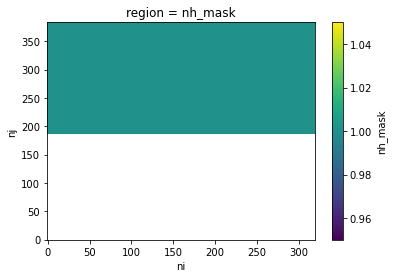

In [17]:
# verify it worked - choose one region to plot
masks.sel(region='nh_mask').plot()

In [18]:
masks

<xarray.DataArray 'nh_mask' (region: 11, nj: 384, ni: 320)>
dask.array<concatenate, shape=(11, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * region   (region) <U12 'nh_mask' 'Lab_mask' ... 'CAArch_mask' 'Okhotsk_mask'
Dimensions without coordinates: nj, ni

In [19]:
#mask just regions to calculate total ice area and ice volumes
data_all_masked = data_all_mod*masks
tarea_masked = tarea*masks


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/dask/array/core.py:4409: PerformanceWarning: Increasing number of chunks by factor of 10
  **blockwise_kwargs,


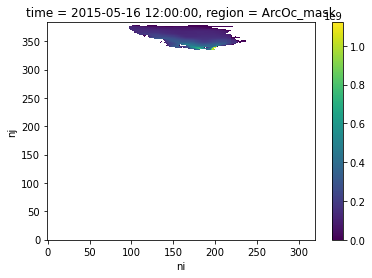

In [20]:
#just test that it worked properly
data_all_masked.sel(member_id=0,region='ArcOc_mask').isel(time=4).plot()

## Calculate regional averages

- Sum both data_all_masked and tarea_masked over nj and ni.
- Divide SUM(data_all_masked) by SUM(tarea_masked)

In [21]:
# now sum by nj and ni and divide by the tarea summed by nj and ni (area weighted average)
total = data_all_masked.sum(dim=['nj','ni'])/tarea_masked.sum(dim=['nj','ni'])

In [22]:
total

<xarray.DataArray (member_id: 5, time: 1032, region: 11)>
dask.array<truediv, shape=(5, 1032, 11), dtype=float64, chunksize=(1, 600, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * region   (region) <U12 'nh_mask' 'Lab_mask' ... 'CAArch_mask' 'Okhotsk_mask'
Dimensions without coordinates: member_id

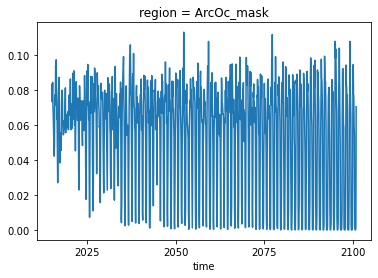

In [23]:
# check the values here
total.sel(region='ArcOc_mask').isel(member_id=0).plot()

### Actually load the data now

Before, all the calculations were "lazy" version

In [24]:
%%time
## slow step
total.load()

CPU times: user 36.8 s, sys: 28.1 s, total: 1min 4s
Wall time: 2min 4s


<xarray.DataArray (member_id: 5, time: 1032, region: 11)>
array([[[6.04001911e-03, 3.09939370e-02, 6.10656827e-02, ...,
         1.76610693e-02, 1.58238864e-03, 2.46110695e-02],
        [5.69745124e-03, 3.70220388e-02, 6.62667178e-02, ...,
         2.14804436e-02, 1.97202887e-03, 3.41136355e-02],
        [5.91270938e-03, 3.96434500e-02, 4.45123545e-02, ...,
         2.86891705e-02, 1.37018205e-03, 3.07030202e-02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.83292087e-05, 6.75238259e-04, 0.00000000e+00, ...,
         0.00000000e+00, 2.41753432e-04, 0.00000000e+00],
        [2.96040955e-03, 7.96858210e-03, 2.39596154e-03, ...,
         1.46838836e-04, 1.24431005e-02, 0.00000000e+00]],

       [[5.26771949e-03, 2.92773371e-02, 4.35795859e-02, ...,
         1.77233984e-02, 2.19041870e-03, 1.97315364e-02],
        [5.72676144e-03, 3.30320330e-02, 5.49290825e-02, ...,
         2.94829637e-02, 1.39783480e-03, 3.01316210e-02],
        [5.25210942e-03, 3.13319041e-02, 3.96402745e-02, ...,
         2.51073996e-02, 2.13674953e-03, 3.38080030e-02],
...
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.69983784e-05, 7.83564809e-05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.50083151e-03, 3.69156615e-03, 4.86654007e-03, ...,
         0.00000000e+00, 6.51646855e-03, 0.00000000e+00]],

       [[6.30363140e-03, 3.42390240e-02, 4.28557227e-02, ...,
         3.17109622e-02, 2.74560026e-03, 2.61690654e-02],
        [5.63497951e-03, 3.75106872e-02, 5.47932846e-02, ...,
         2.72758999e-02, 1.07472553e-03, 3.34706838e-02],
        [5.20895994e-03, 3.97103193e-02, 5.10634143e-02, ...,
         2.36222008e-02, 1.19542336e-03, 2.70023216e-02],
        ...,
        [1.77517489e-07, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.67154501e-05, 5.63510885e-04, 6.74867778e-05, ...,
         0.00000000e+00, 5.34986075e-04, 0.00000000e+00],
        [5.50164661e-04, 3.37360016e-03, 2.57521844e-03, ...,
         0.00000000e+00, 5.79203528e-03, 0.00000000e+00]]])
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * region   (region) <U12 'nh_mask' 'Lab_mask' ... 'CAArch_mask' 'Okhotsk_mask'
Dimensions without coordinates: member_id

In [25]:
# assign member_id as coordinate array
total['member_id']=total.member_id.values

In [26]:
total.coords

Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * region     (region) <U12 'nh_mask' 'Lab_mask' ... 'Okhotsk_mask'
  * member_id  (member_id) int64 0 1 2 3 4

In [27]:
total

<xarray.DataArray (member_id: 5, time: 1032, region: 11)>
array([[[6.04001911e-03, 3.09939370e-02, 6.10656827e-02, ...,
         1.76610693e-02, 1.58238864e-03, 2.46110695e-02],
        [5.69745124e-03, 3.70220388e-02, 6.62667178e-02, ...,
         2.14804436e-02, 1.97202887e-03, 3.41136355e-02],
        [5.91270938e-03, 3.96434500e-02, 4.45123545e-02, ...,
         2.86891705e-02, 1.37018205e-03, 3.07030202e-02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.83292087e-05, 6.75238259e-04, 0.00000000e+00, ...,
         0.00000000e+00, 2.41753432e-04, 0.00000000e+00],
        [2.96040955e-03, 7.96858210e-03, 2.39596154e-03, ...,
         1.46838836e-04, 1.24431005e-02, 0.00000000e+00]],

       [[5.26771949e-03, 2.92773371e-02, 4.35795859e-02, ...,
         1.77233984e-02, 2.19041870e-03, 1.97315364e-02],
        [5.72676144e-03, 3.30320330e-02, 5.49290825e-02, ...,
         2.94829637e-02, 1.39783480e-03, 3.01316210e-02],
        [5.25210942e-03, 3.13319041e-02, 3.96402745e-02, ...,
         2.51073996e-02, 2.13674953e-03, 3.38080030e-02],
...
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.69983784e-05, 7.83564809e-05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.50083151e-03, 3.69156615e-03, 4.86654007e-03, ...,
         0.00000000e+00, 6.51646855e-03, 0.00000000e+00]],

       [[6.30363140e-03, 3.42390240e-02, 4.28557227e-02, ...,
         3.17109622e-02, 2.74560026e-03, 2.61690654e-02],
        [5.63497951e-03, 3.75106872e-02, 5.47932846e-02, ...,
         2.72758999e-02, 1.07472553e-03, 3.34706838e-02],
        [5.20895994e-03, 3.97103193e-02, 5.10634143e-02, ...,
         2.36222008e-02, 1.19542336e-03, 2.70023216e-02],
        ...,
        [1.77517489e-07, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.67154501e-05, 5.63510885e-04, 6.74867778e-05, ...,
         0.00000000e+00, 5.34986075e-04, 0.00000000e+00],
        [5.50164661e-04, 3.37360016e-03, 2.57521844e-03, ...,
         0.00000000e+00, 5.79203528e-03, 0.00000000e+00]]])
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * region     (region) <U12 'nh_mask' 'Lab_mask' ... 'Okhotsk_mask'
  * member_id  (member_id) int64 0 1 2 3 4

### Plot just to check

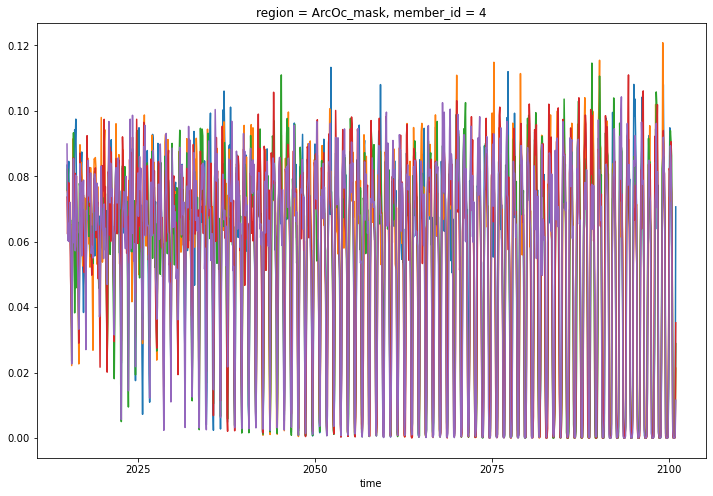

In [28]:
import nc_time_axis
# Setup the figure
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Loop through and plot each member_id all months in 251 years
for member_id in total.member_id.values:
    total.sel(region='ArcOc_mask',member_id=member_id).plot(ax=ax, label=member_id)

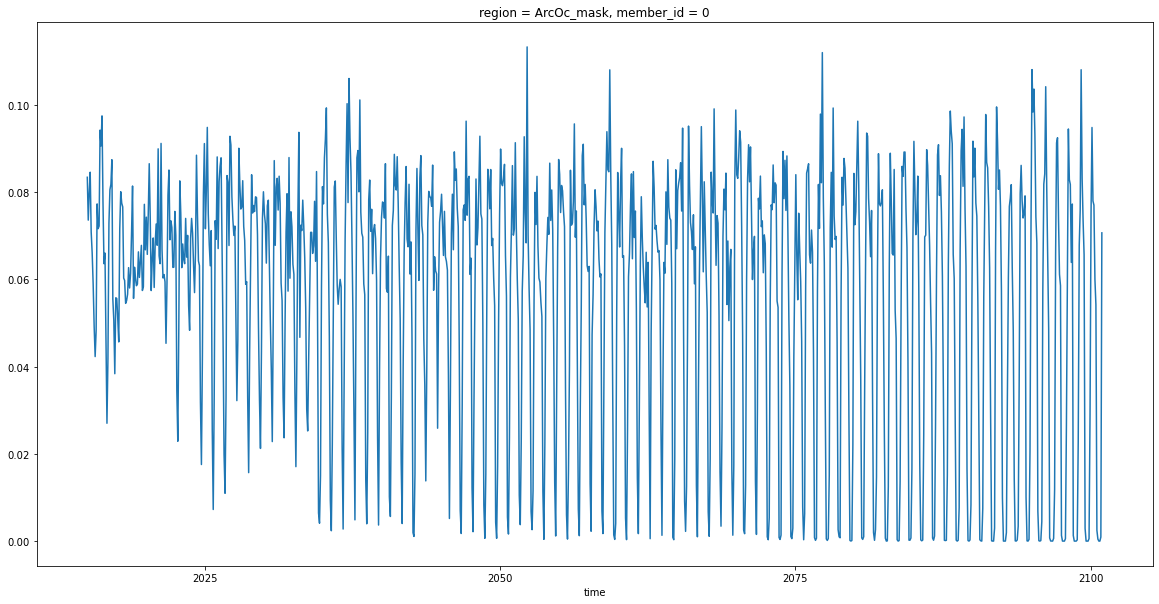

In [29]:
# Setup the figure
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

# Plot just one to check
total.sel(region='ArcOc_mask',member_id=0).plot(ax=ax, label='ens')

### Save the timeseries

In [30]:
fout = 'rufmod_all_transient_regional_avg_'+var_in_1

In [31]:
total.data.shape

(5, 1032, 11)

In [32]:
ds_to_save = xr.Dataset({'regional_totals': (['member_id','time','region'], total.data)},
                        coords={'time':(['time'],total.time.values),
                                'member_id':(['member_id'],total.member_id.values),
                                'region':(['region'],total.region.values)},
                        attrs={'Author': 'Alice DuVivier', 'units':units, 'longname':longname})

In [33]:
# double check dataset we plan to save
ds_to_save

<xarray.Dataset>
Dimensions:          (member_id: 5, time: 1032, region: 11)
Coordinates:
  * time             (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id        (member_id) int64 0 1 2 3 4
  * region           (region) <U12 'nh_mask' 'Lab_mask' ... 'Okhotsk_mask'
Data variables:
    regional_totals  (member_id, time, region) float64 0.00604 0.03099 ... 0.0
Attributes:
    Author:    Alice DuVivier
    units:     m/s
    longname:  ice speed

In [34]:
ds_to_save.to_netcdf(fout+'.nc')  # how to save file